<a href="https://colab.research.google.com/github/Varshnisv/CAPSTONE_PROJECT_4/blob/main/Project_4_Play_Store_Review_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAPSTONE PROJECT 4 EDA TO DASHBOARD


TOPIC: PLAY STAORE REVIEW ANALYSIS


INDIVIDUAL: VARSHNI S V


PROBLEM:

The DataViz Challenge is a comprehensive data visualization project designed to assess participants' data analysis, dashboard creation, and presentation skills. In this challenge, participants will leverage a dataset of their choice, which they previously analyzed during an Exploratory Data Analysis (EDA) project in Python.

Participants are tasked with designing an interactive and informative Tableau Desktop/Tableau Public/PowerBI Dashboard using the dataset that was used during EDA. The dashboard should effectively convey insights, trends, and key findings from the data, making it accessible and understandable for a diverse audience. Participants should strive for both visual appeal and data-driven decision support.

STEPS INVOLVED:

STEP 1: I cleaned the datasets for play store and user review datasets and loaded a new cleaned dataset

Step 2: Created 15 Data visualizing dashboard in POwerBI

Step 3: I have added that in Github and Google colab for better understanding with main 3 points for all Data Visualizations.


GITHUB LINK:

POWERBI LINK:https://drive.google.com/file/d/1PBzgCrYIwGomVOp3G60mVh45Ytdo-o-a/view?usp=drive_link

In [ ]:
# Import Libraries

#Pandas lib is imported as variable pd
import pandas as pd
#Numpy lib is imported as variable np
import numpy as np



In [ ]:
# Load Dataset
App_DATA = pd.read_csv('Play Store Data.csv')
Rev_DATA = pd.read_csv('User Reviews.csv')

In [ ]:
#Creating dataframes and loading the raw dataset that is it is still not cleaned
reviews_df = pd.read_csv('User Reviews.csv')
playstore_df = pd.read_csv('Play Store Data.csv')


In [ ]:
#Highlighing and displaying the first 5 Datas of both datasets
print("User Reviews Data:")
print(reviews_df.head(), "\n")
print("Play Store Data:")
print(playstore_df.head())

User Reviews Data:
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000   

Play Store Data:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_A

In [ ]:
#Here we are printing the datatypes of all data in both dataset

print("User Reviews Data Info:")
print(reviews_df.info(), "\n")
print("Play Store Data Info:")
print(playstore_df.info())

User Reviews Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None 

Play Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  

In [ ]:
#Displaying the missing Values
print("Missing Values in User Reviews Data:")
print(reviews_df.isnull().sum() / len(reviews_df) * 100, "\n")

print("Missing Values in Play Store Data:")
print(playstore_df.isnull().sum() / len(playstore_df) * 100)


Missing Values in User Reviews Data:
App                        0.000000
Translated_Review         41.788631
Sentiment                 41.780854
Sentiment_Polarity        41.780854
Sentiment_Subjectivity    41.780854
dtype: float64 

Missing Values in Play Store Data:
App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


In [ ]:
# Fill or drop missing values based on observation
# Drop rows with missing values in critical columns (e.g., Rating, Category) in Play Store data
playstore_df = playstore_df.dropna(subset=['Rating', 'Category'])

# Fill missing sentiment scores with median in User Reviews data
reviews_df['Sentiment_Polarity'] = reviews_df['Sentiment_Polarity'].fillna(reviews_df['Sentiment_Polarity'].median())
reviews_df['Sentiment_Subjectivity'] = reviews_df['Sentiment_Subjectivity'].fillna(reviews_df['Sentiment_Subjectivity'].median())


In [ ]:
import numpy as np

# Convert non-numeric entries to NaN in the "Installs" column
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'].str.replace('[+,]', '', regex=True), errors='coerce')

# Drop rows where "Installs" is NaN (non-numeric entries)
playstore_df = playstore_df.dropna(subset=['Installs'])

# Convert "Installs" column to integer
playstore_df['Installs'] = playstore_df['Installs'].astype(int)


<ipython-input-10-f78525578431>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_df['Installs'] = playstore_df['Installs'].astype(int)


In [ ]:
# Ensure "Installs" column is treated as strings before replacing
playstore_df['Installs'] = playstore_df['Installs'].astype(str)

# Remove non-numeric characters from "Installs" and convert to numeric, with errors set to 'coerce' for invalid parsing
playstore_df['Installs'] = pd.to_numeric(playstore_df['Installs'].str.replace('[+,]', '', regex=True), errors='coerce')

# Drop rows with NaN values in "Installs"
playstore_df = playstore_df.dropna(subset=['Installs']).copy()

# Convert "Installs" column to integer
playstore_df['Installs'] = playstore_df['Installs'].astype(int)


In [ ]:
import pandas as pd

# Ensure 'Installs' column is treated as strings
playstore_df['Installs'] = playstore_df['Installs'].astype(str)

# Convert non-numeric entries to NaN in the "Installs" column using .loc to avoid warnings
playstore_df.loc[:, 'Installs'] = pd.to_numeric(playstore_df['Installs'].str.replace('[+,]', '', regex=True), errors='coerce')

# Drop rows where "Installs" is NaN (non-numeric entries)
playstore_df.dropna(subset=['Installs'], inplace=True)


In [ ]:
#Displaying the 5 datas of playstore dataset
print(playstore_df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size  Installs  Type Price Content Rating  \
0     159   19M     10000  Free     0       Everyone   
1     967   14M    500000  Free     0       Everyone   
2   87510  8.7M   5000000  Free     0       Everyone   
3  215644   25M  50000000  Free     0           Teen   
4     967  2.8M    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 

In [ ]:
#Describing the data
print(playstore_df['Installs'].describe())

count        9366
unique         19
top       1000000
freq         1577
Name: Installs, dtype: int64


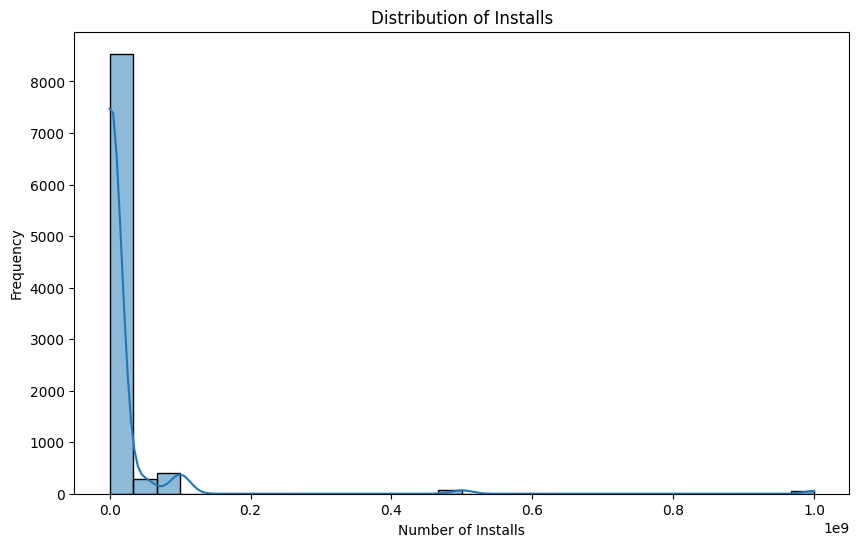

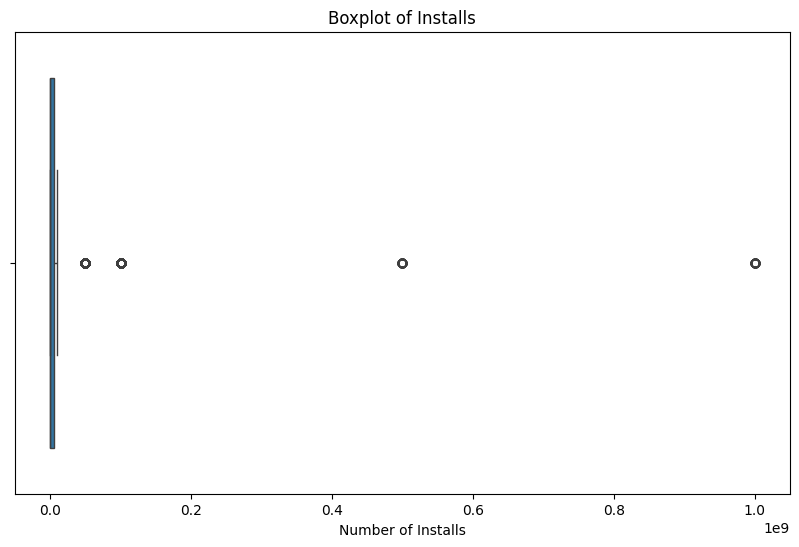

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(playstore_df['Installs'], bins=30, kde=True)
plt.title('Distribution of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=playstore_df['Installs'])
plt.title('Boxplot of Installs')
plt.xlabel('Number of Installs')
plt.show()

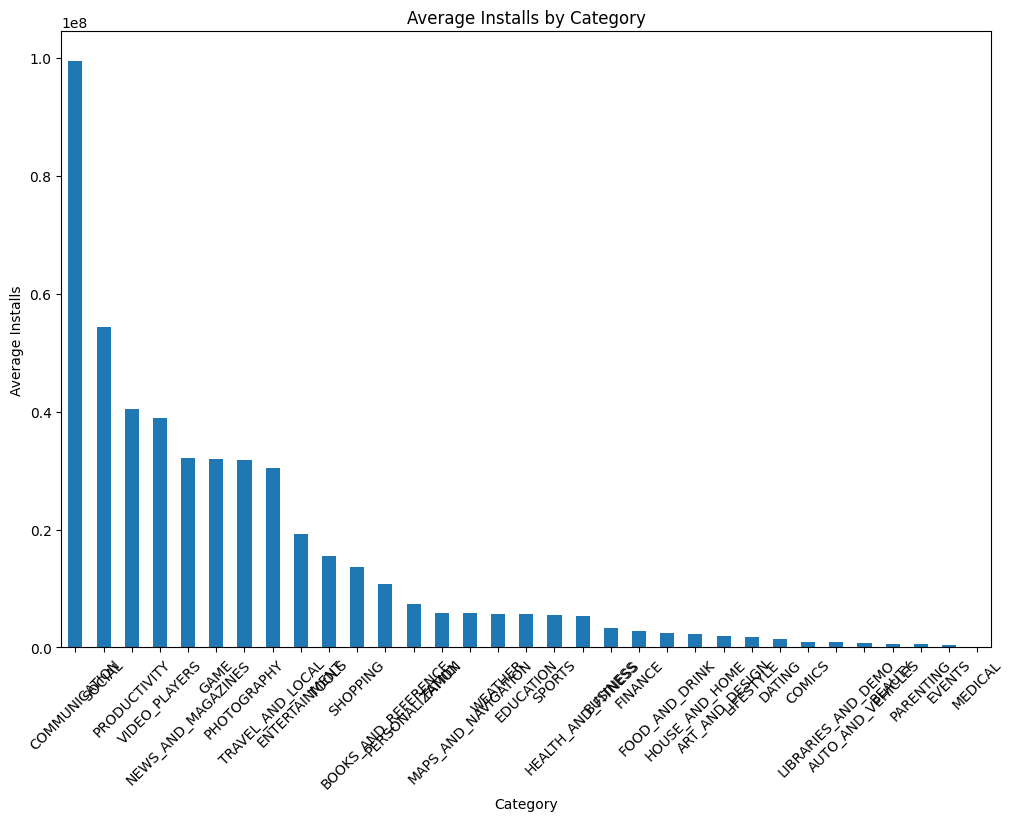

In [ ]:
# Group by category and calculate average installs
category_installs = playstore_df.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# Plotting the average installs per category
plt.figure(figsize=(12, 8))
category_installs.plot(kind='bar')
plt.title('Average Installs by Category')
plt.xlabel('Category')
plt.ylabel('Average Installs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
playstore_df.to_csv('cleaned_playstore_data.csv', index=False)

In [ ]:
# Display the first few rows and structure of the reviews DataFrame
print(reviews_df.head())
print(reviews_df.info())


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                0.15                0.514286  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------     

In [ ]:
# Remove missing values in the 'Translated_Review' column
reviews_df.dropna(subset=['Translated_Review'], inplace=True)

# Convert reviews to lowercase
reviews_df['Translated_Review'] = reviews_df['Translated_Review'].str.lower()

# Remove special characters and numbers from reviews
reviews_df['Translated_Review'] = reviews_df['Translated_Review'].str.replace('[^a-z\s]', '', regex=True)

# Optional: Remove stop words (you can use NLTK or any library for this)
from nltk.corpus import stopwords

# Download the stopwords if not already downloaded
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
reviews_df['Translated_Review'] = reviews_df['Translated_Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Add a column for review length
reviews_df['Review_Length'] = reviews_df['Translated_Review'].str.len()

# Calculate the number of unique words in each review
reviews_df['Unique_Words'] = reviews_df['Translated_Review'].apply(lambda x: len(set(x.split())))

# Show basic statistics
print(reviews_df[['Review_Length', 'Unique_Words']].describe())


       Review_Length  Unique_Words
count    37427.00000  37427.000000
mean        97.93999     13.724210
std         91.91316     11.695327
min          0.00000      0.000000
25%         28.00000      4.000000
50%         75.00000     11.000000
75%        142.00000     20.000000
max       2329.00000    243.000000


In [ ]:
from textblob import TextBlob

# Define a function to get sentiment polarity
def get_sentiment(Translated_Review):
    return TextBlob(Translated_Review).sentiment.polarity

# Apply the function to the 'Review' column
reviews_df['Sentiment'] = reviews_df['Translated_Review'].apply(get_sentiment)

# Show a few rows with sentiment
print(reviews_df[['Translated_Review', 'Sentiment']].head())


                                   Translated_Review  Sentiment
0  like eat delicious food thats im cooking food ...       1.00
1         help eating healthy exercise regular basis       0.25
3         works great especially going grocery store       0.40
4                                       best idea us       1.00
5                                           best way       1.00


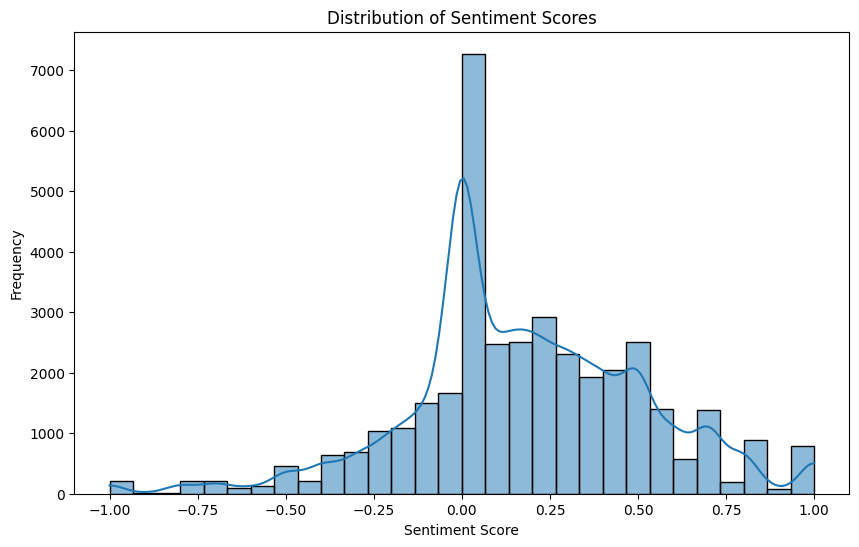

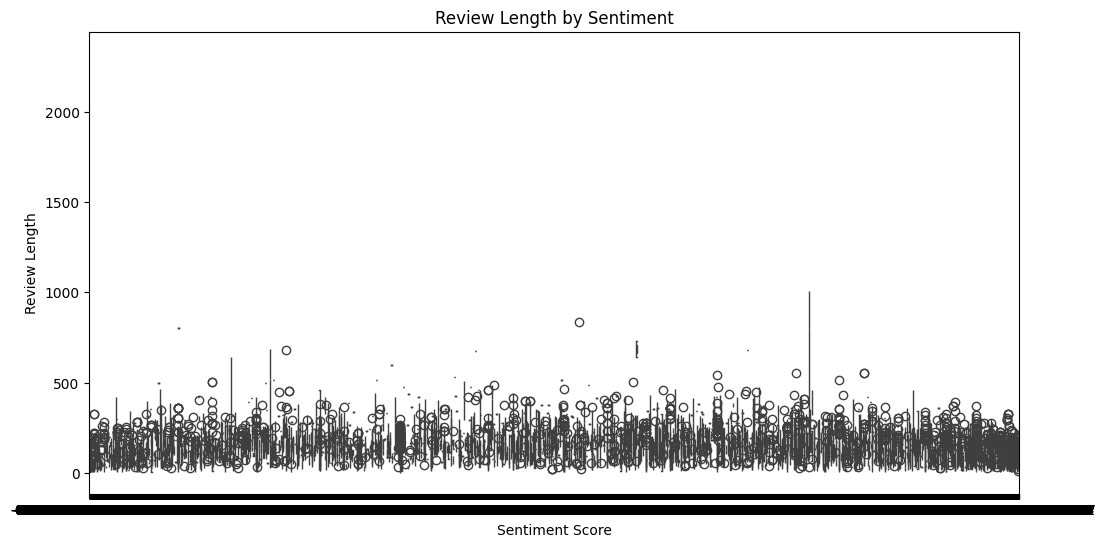

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(reviews_df['Sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot of review lengths by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='Review_Length', data=reviews_df)
plt.title('Review Length by Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Review Length')
plt.show()


In [ ]:
reviews_df.to_csv('cleaned_user_reviews.csv', index=False)

In [ ]:
# Save cleaned user reviews DataFrame to CSV
reviews_df.to_csv('cleaned_user_reviews.csv', index=False)

# Save cleaned playstore DataFrame to CSV
playstore_df.to_csv('cleaned_playstore_data.csv', index=False)

from google.colab import files

# Download the CSV files to your local machine
files.download('cleaned_user_reviews.csv')
files.download('cleaned_playstore_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**POWERBI DATAVISUALIZATION OF BOTH DATASETS AFTER CLEANING THEM WITH THE REASON BEHIND AND INSIGHTS OF EACH OF THEM:**

***PAGE 1***

**App Distribution and Basic Details Part 1**

1.


*   Card Visual: Total Apps Count, Total Installs and Average Rating

*   Insight: It shows the data of app count, avg rating and total installs.

*   Visualization Type: Card Visual


*   Positive/Negative: Positive.




2.


*   Card Visual: Category and Apps count in user Review

*   Insight: Visualize or show the above two data

*   Visualization Type: Card Visual

*   Type: Positive




3.

*   Slicer on installs

*   Insight: Identifies the installs in slicer format from 0 to max.

*   Visualization Type: Slicer

*   Positive/Negative: Positive.




4.
*   Bar Chart: Category vs Rating

*   Insight: Shows how different category affect app ratings

*   Visualization Type: Bar Chart

*   Positive/Negative: Positive.




5.
*   Table: Category

*   Insight: Gives blocks of different types of Category

*   Visualization Type: Table

*   Positive/Negative: Positive.

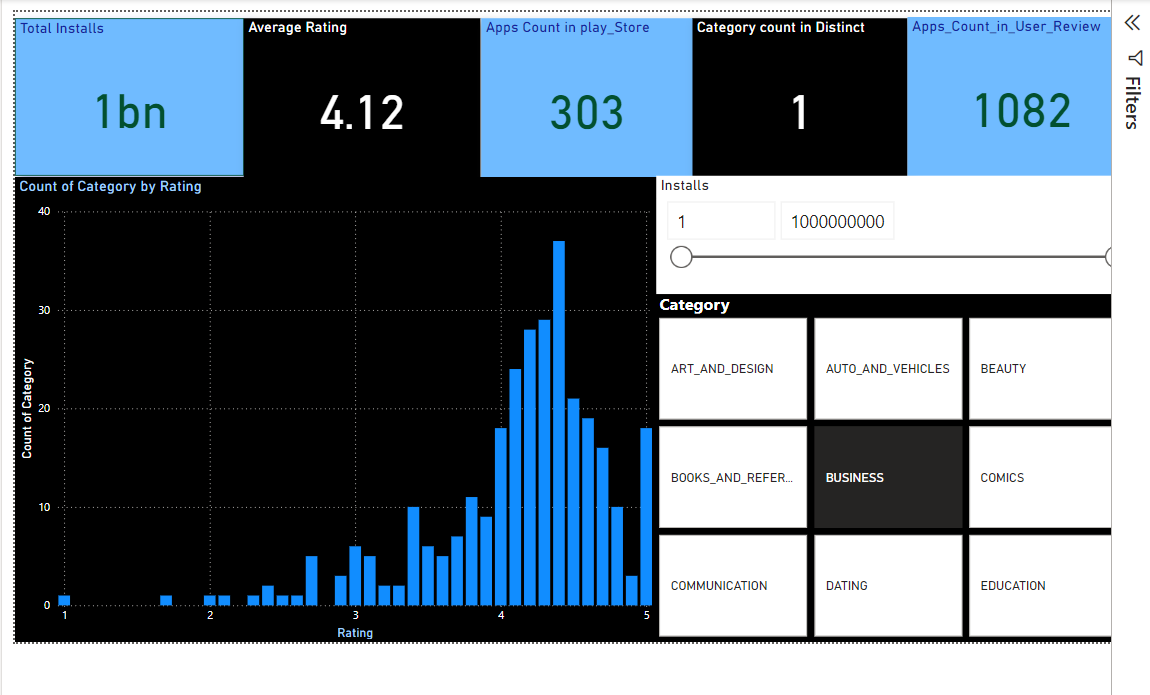

***PAGE 2***

**App Distribution and Basic Details Part 2**

6.


*   Bar Chart: Distribution of Apps by Category

*   Insight: Shows which categories are most populated, indicating user interest.
*   Visualization Type: Bar Chart


*   Positive/Negative: Positive (high app count indicates popularity).




7.


*   Pie Chart: Proportion of Free vs. Paid Apps

*   Insight: Highlights the trend towards free apps, reflecting consumer
  preferences.

*   Visualization Type: Pie Chart

*   Type: Positive




8.

*   Column Chart: Top 10 Apps by Install Count

*   Insight: Identifies the most successful apps in terms of installs.

*   Visualization Type: Column Chart

*   Positive/Negative: Positive (high install counts indicate user approval).




9.
*   Stacked Column Chart: App Ratings by Content Rating

*   Insight: Shows how different content ratings affect app ratings

*   Visualization Type: Stacked Column Chart

*   Positive/Negative: Positive (high install counts indicate user approval).




10.
*   3 different Card Visual: Total Number of Apps, Average Rating and Total Sum of installs

*   Insight: Gives an overall snapshot of the app landscape, Average Rating and Total Sum of installs

*   Visualization Type: Card Visual

*   Positive/Negative: Positive (high install counts indicate user approval).

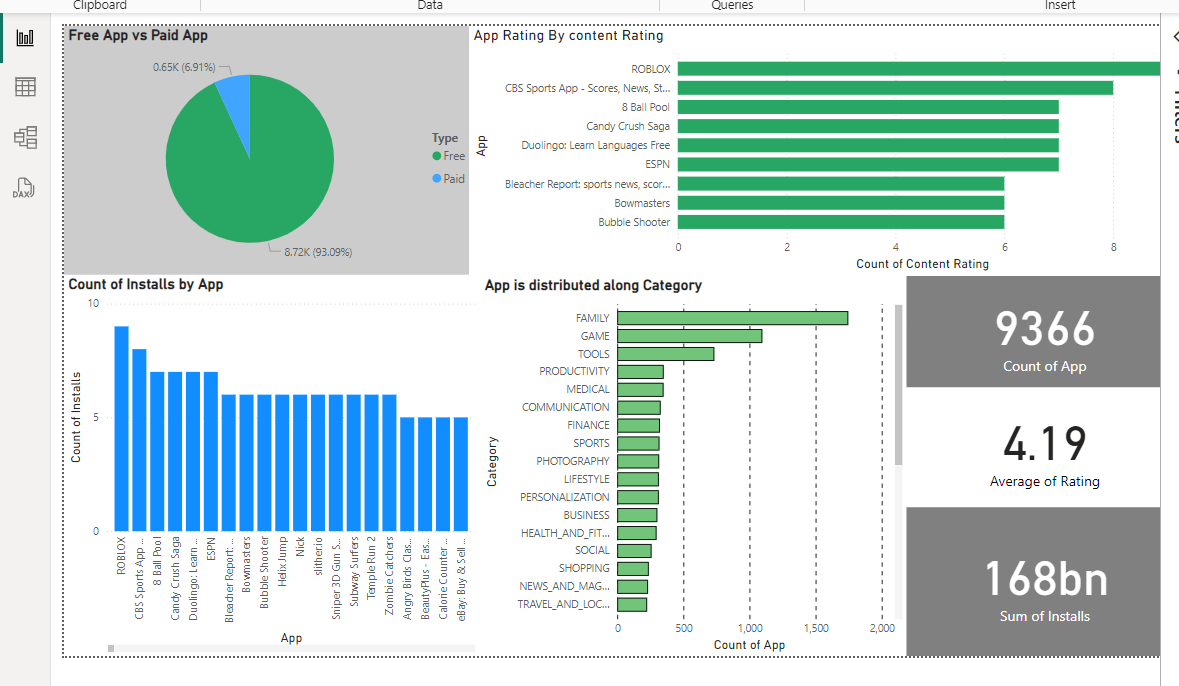







***PAGE 3***

***App Engagement and User Feedback***

11.
*   Line Chart: Trends in Average Sentiment Polarity Over Time

*   Insight: Tracks how user sentiment changes over time, reflecting engagement.

*   Visualization Type: Line Chart

*   Positive/Negative: Positive (high it is because it is moving upward).






12.
*   Bar Chart: Average Review Length by Category

*   Insight: Indicates user engagement levels in different categories.

*   Visualization Type: Bar Chart

*   Positive/Negative: Positive (longer reviews suggest more engagement).




13.
*   Scatter Plot: Rating vs. Installs

*   Insight: Explores the relationship between ratings and install counts.

*   Visualization Type: Scatter Plot

*   Positive/Negative: Positive (high ratings correlate with installs).




14.
*   Pie Chart: Distribution of Sentiment Polarity

*   Insight: Insight: Visualizes the overall sentiment of user reviews.

*   Visualization Type: Pie Chart

*   Positive/Negative: Positive




15.
*   Card Visual: Average Rating Across All Apps

*   Insight: Shows the overall app quality based on user feedback.

*   Visualization Type: Card Visual

*   Positive/Negative: Positive



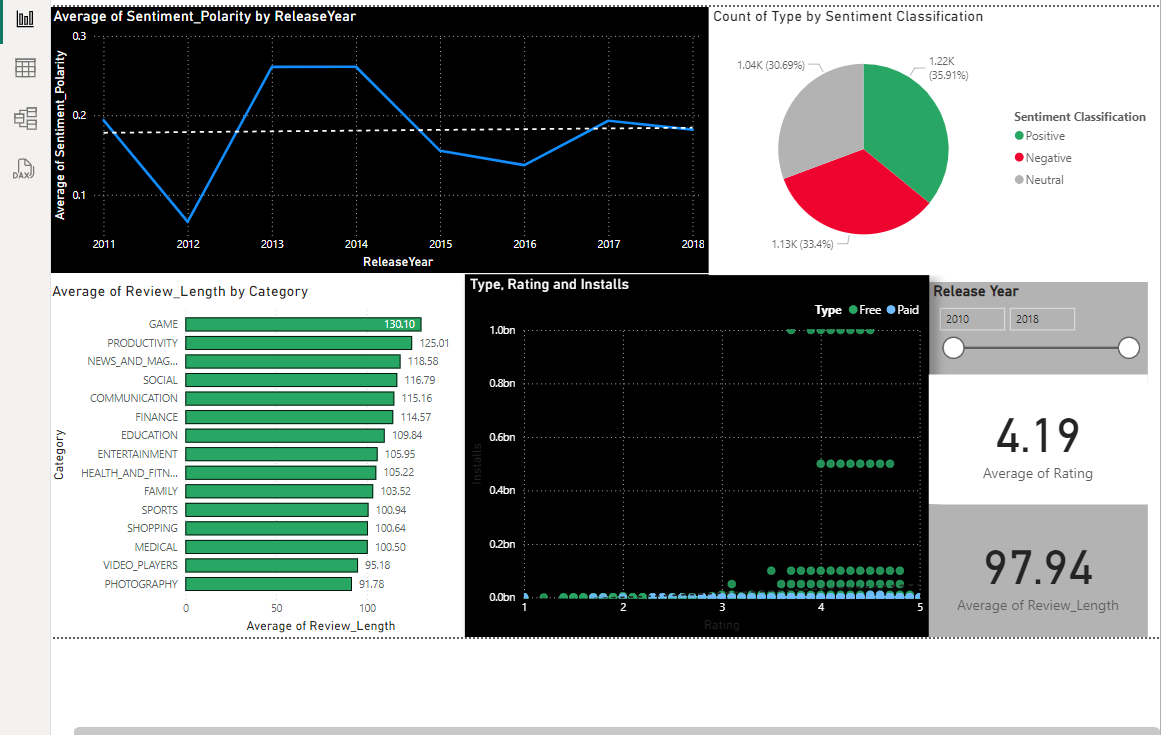

***PAGE 4***

***App Popularity and Ratings Analysis***

16.

*   Histogram: Distribution of Ratings

*   Insight: Displays how ratings are distributed across all apps.

*   Visualization Type: Histogram

*   Positive/Negative: Neutral (helps identify rating trends).






17.


*   Tree Map: Number of Installs per Category

*   Insight: Represents the popularity of app categories based on installs

*   Visualization Type: Tree Map


*   Positive/Negative: Positive (shows category popularity)






18.


*   Clustered Bar Chart: Average Rating by Category

*   Insight: Compares average ratings across different app categories.

*   Visualization Type: Clustered Bar Chart

*   Positive/Negative: Positive (high average ratings indicate quality).








19.

*   Bubble Chart: App Price vs. Installs

*   Insight: Analyzes the relationship between app pricing and installs.

*   Visualization Type: Bubble Chart

*   Positive/Negative: Positive (successful pricing strategies).



20.


*   Total Number of Reviews

*   Insight: Highlights overall user feedback volume.

*   Visualization Type: Card Visual

*   Positive/Negative: Positive (high volume indicates engagement).








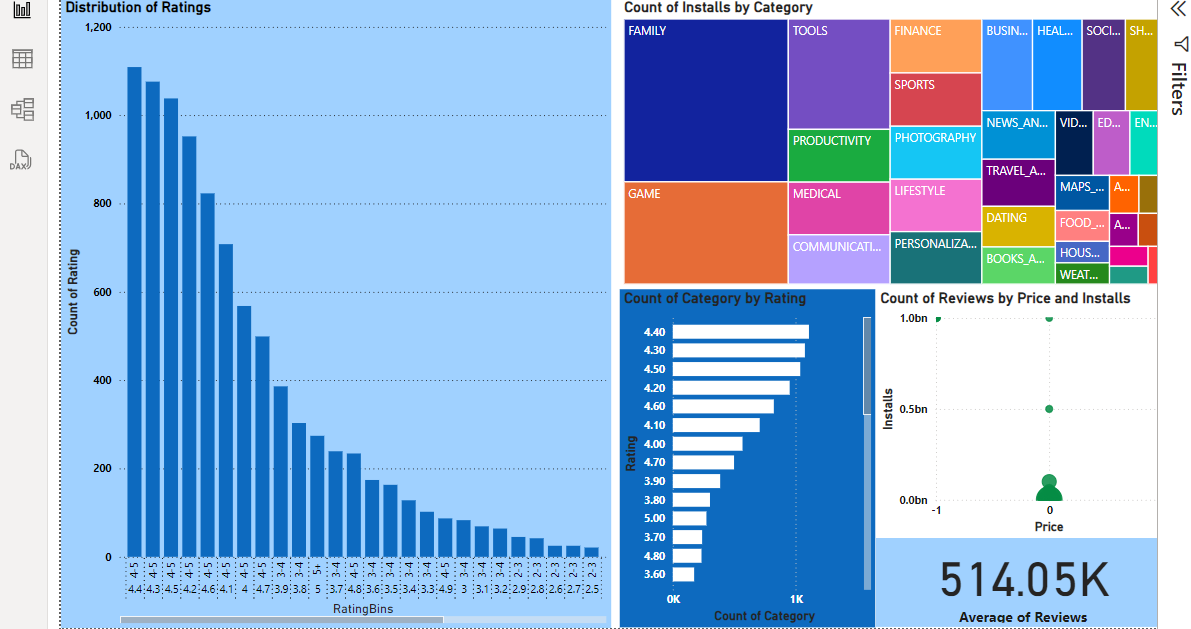

***PAGE 5***

***Sentiment and Detailed Review Insights***

21.


*   Stacked Column Chart: Sentiment Scores by Category

*   Insight: Visualizes user sentiment by app category.

*   Visualization Type: Stacked Column Chart

*   Positive/Negative: Mixed (depends on the sentiment distribution).



22.



*   Bar Chart: Number of Unique Words in Reviews by Category

*   Insight: Shows how descriptive reviews are across categories.


*   Visualization Type: Bar Chart


*   Positive/Negative: Positive (more unique words indicate engagement).


23.

*   Line Chart: Sentiment Subjectivity Over Time

*   Insight: Tracks how subjective sentiment varies over time.


*   Visualization Type: Line Chart


*   Positive/Negative: Positive.






24.

*   Heatmap: Average Review Sentiment by Category and Content Rating

*   Insight: Displays sentiment levels based on app category and content.


*   Visualization Type: Heatmap


*   Positive/Negative: Mixed.




25.


*   Card Visual: Total Number of Unique Reviews

*   Insight: Shows the number of distinct reviews submitted.


*   Visualization Type: Card Visual


*   Positive/Negative: Positive.

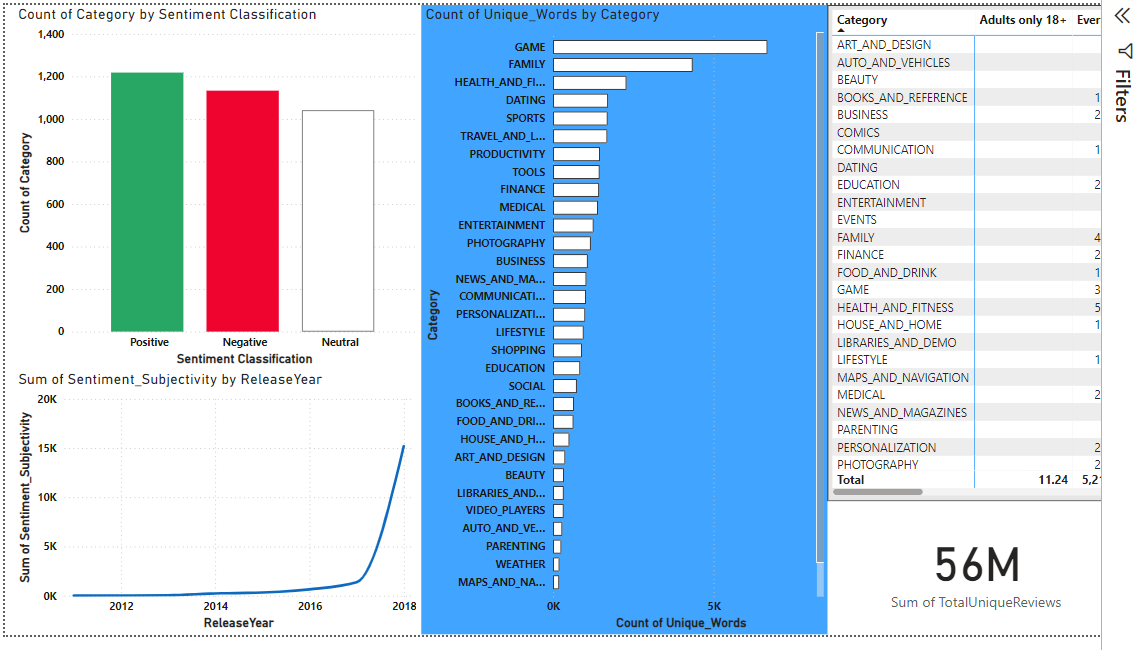